#### Machine Learning CIA 2 
#### Ragadharshini R - 21011102078

### Question 1

#### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Loading the Data

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Pre-Processing

In [5]:
y_train = train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255

In [6]:
X_test = test_data.values/255

#### Sneak Peak into the Data

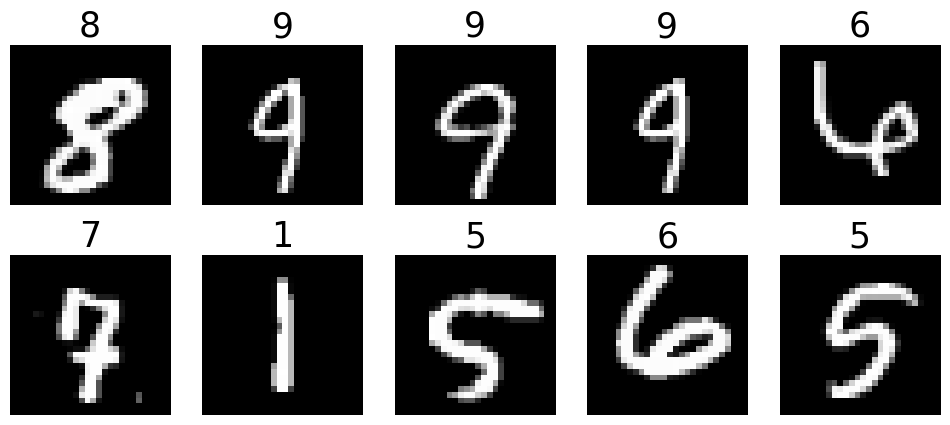

In [7]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,100,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [9]:
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

Training Shape: (42000, 784)
Testing Shape: (28000, 784)


#### Activation and Layer Definition

In [10]:
def relu(x):
    x[x<0]=0
    return x

In [12]:
def softmax(X_in,weights):
    s = np.exp(np.matmul(X_in,weights))
    total = np.sum(s, axis=1).reshape(-1,1)
    return s / total

In [11]:
def h(X,W,b):
    a1 = X
    z1 = np.matmul(X, W[0]) + b[0]
    a2 = relu(z1)
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    return sigma

#### Loss Definition

In [13]:
def loss(y_pred,y_true):
    global K 
    K = 10
    N = len(y_true)
    y_true_one_hot_vec = (y_true[:,np.newaxis] == np.arange(K))
    loss_sample = (np.log(y_pred) * y_true_one_hot_vec).sum(axis=1)
    return -np.mean(loss_sample)

#### Backprop

In [14]:
def backprop(W,b,X,y,alpha=1e-4):
    K = 10
    N = X.shape[0]
    a1 = X
    z1 = np.matmul(X, W[0]) + b[0]
    a2 = relu(z1)
    z2 = np.matmul(a2, W[1])
    s = np.exp(z2)
    total = np.sum(s, axis=1).reshape(-1,1)
    sigma = s/total
    y_one_hot_vec = (y[:,np.newaxis] == np.arange(K))
    delta2 = (sigma - y_one_hot_vec)
    grad_W1 = np.matmul(a2.T, delta2)
    delta1 = np.matmul(delta2, W[1].T)*(z1>0)
    grad_W0 = np.matmul(X.T, delta1)
    dW = [grad_W0/N + alpha*W[0], grad_W1/N + alpha*W[1]]
    db = [np.mean(delta1, axis=0)]
    return dW, db

#### HyperParams and Layer Init

In [18]:
eta = 5e-1
alpha = 1e-6 
gamma = 0.99 
eps = 1e-3 
num_iter = 300 
n_H = 256 
n = X_train.shape[1] 
K = 10

In [19]:
np.random.seed(1127825)
W = [1e-1*np.random.randn(n, n_H), 1e-1*np.random.randn(n_H, K)]
b = [np.random.randn(n_H)]

#### Training

In [20]:
%%time
gW0 = gW1 = gb0 = 1

for i in range(num_iter):
    dW, db = backprop(W,b,X_train,y_train,alpha)
    
    gW0 = gamma*gW0 + (1-gamma)*np.sum(dW[0]**2)
    etaW0 = eta/np.sqrt(gW0 + eps)
    W[0] -= etaW0 * dW[0]
    
    gW1 = gamma*gW1 + (1-gamma)*np.sum(dW[1]**2)
    etaW1 = eta/np.sqrt(gW1 + eps)
    W[1] -= etaW1 * dW[1]
    
    gb0 = gamma*gb0 + (1-gamma)*np.sum(db[0]**2)
    etab0 = eta/np.sqrt(gb0 + eps)
    b[0] -= etab0 * db[0]
    
    if i % 100 == 0:
        y_pred = h(X_train,W,b)
        print("Cross-entropy loss after", i+1, "iterations is {:.8}".format(
              loss(y_pred,y_train)))
        print("Training accuracy after", i+1, "iterations is {:.4%}".format( 
              np.mean(np.argmax(y_pred, axis=1)== y_train)))
        
        print("gW0={:.4f} gW1={:.4f} gb0={:.4f}\netaW0={:.4f} etaW1={:.4f} etab0={:.4f}"
              .format(gW0, gW1, gb0, etaW0, etaW1, etab0))
        
        print("|dW0|={:.5f} |dW1|={:.5f} |db0|={:.5f}"
             .format(np.linalg.norm(dW[0]), np.linalg.norm(dW[1]), np.linalg.norm(db[0])), "\n")
        
        gW0 = gW1 = gb0 = 1

y_pred_final = h(X_train,W,b)
print("Final cross-entropy loss is {:.8}".format(loss(y_pred_final,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final, axis=1)== y_train)))

Cross-entropy loss after 1 iterations is 7.6743264
Training accuracy after 1 iterations is 24.9262%
gW0=1.0839 gW1=1.3825 gb0=0.9923
etaW0=0.4800 etaW1=0.4251 etab0=0.5017
|dW0|=3.06418 |dW1|=6.26530 |db0|=0.48001 

Cross-entropy loss after 101 iterations is 0.25170729
Training accuracy after 101 iterations is 92.7048%
gW0=0.5415 gW1=0.5503 gb0=0.3699
etaW0=0.6789 etaW1=0.6734 etab0=0.8210
|dW0|=0.07804 |dW1|=0.06792 |db0|=0.01008 

Cross-entropy loss after 201 iterations is 0.20919058
Training accuracy after 201 iterations is 94.4762%
gW0=0.4532 gW1=0.4147 gb0=0.3679
etaW0=0.7419 etaW1=0.7755 etab0=0.8233
|dW0|=0.11250 |dW1|=0.07855 |db0|=0.01711 

Final cross-entropy loss is 0.13910593
Final training accuracy is 96.0429%
CPU times: total: 12min 19s
Wall time: 2min 34s


#### Predictions

In [21]:
y_pred_test = np.argmax(h(X_test,W,b), axis=1)

In [22]:
y_pred_test

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

### Question 2

#### Importing Packages

In [25]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

#### Data Loading

In [24]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#### Data Pre-Processing

In [26]:
num_labels = len(np.unique(y_train))

In [27]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [28]:
image_size = x_train.shape[1]
input_size = image_size * image_size

In [29]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

#### Model Building

In [30]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [31]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [33]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

#### Model Training

In [34]:
model.fit(x_train, y_train, epochs=30, batch_size=batch_size)

Epoch 1/30
469/469 [==============================] - 2s 2ms/step - loss: 0.4298 - accuracy: 0.8654
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1944 - accuracy: 0.9425
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1508 - accuracy: 0.9548
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1279 - accuracy: 0.9615
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1143 - accuracy: 0.9649
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9688
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9702
Epoch 8/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0838 - accuracy: 0.9741
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9742
Epoch 10/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9757

#### Inference

In [35]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 956us/step - loss: 0.0591 - accuracy: 0.9837

Test accuracy: 98.4%
